 Final Exam Example
# An Analysis of Words used by Half-Elven and Elven Female Characters in the Lord of the Rings: The Fellowship of the Ring

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from wordcloud import WordCloud, STOPWORDS
import scipy.stats

The purpose of this analysis is to look at the unique words spoken by some of the female characters in the first installment of the **Lord of the Rings** movie trilogy.  The first book of the trilogy has little female oration.  In fact, Arwen replaced a few male characters in the plotlines, such as Glorfindel who in the book was the character to deliver Frodo to Rivendell after he had been poisoned, so that the movie could have more screen-time for prominent females.  

After the unique words are collected, the analysis will focus on the frequency at which the words occur.  Frequencies can produce a broad image of the character themself: did this character only appear in one scene and only discuss one topic or did they appear in mutliple scenes and engage in multiple aspects of the plot?

Finally, the analysis will compare the average frequencies of the words used by two female characters to see if there is diversity amongst them over the average number of times their unique words were used.

Note:  The below analysis uses quotes from IMDb which includes a subset of all quotes.  We will run the analysis as though the data is a simple random sample from all quotes from the Lord of the Rings: The Fellowship of the Ring.

# Arwen

## Webscraping

In [2]:
page = requests.get('https://www.imdb.com/title/tt0120737/quotes/?tab=qt&ref_=tt_trv_qu')
soup = BeautifulSoup(page.content, 'html.parser')

quote_soup = soup.select('div.sodatext p a')

corpus = {}
word_list = []
character_word_list = []

character_list = ['Arwen']

for quote in quote_soup:
    for character in character_list:
        if quote.text.lower() == character.lower():
            character_quote = quote.next_sibling
            gram_to_remove = [':', '[', '\n', ',', '?', '.', '!', '\'s']
            for gram in gram_to_remove:
                character_quote = character_quote.replace(gram, '')
            if character_quote:
                words = []
                for word in character_quote.split():
                    words.append(word.lower())
                word_list.extend(words)
            character_word_list.extend(word_list)
            corpus[character] = [word for word in character_word_list if word not in STOPWORDS]
        

character_word_freq = {}
for character in corpus:
    word_count_list = []
    unique_word_list = set(corpus[character])
    for word in unique_word_list:
        word_count = (word, corpus[character].count(word))
        word_count_list.append(word_count)
    character_word_freq[character] = word_count_list

df_arwen = pd.DataFrame(character_word_freq[character])
df_arwen.columns = ['word', 'count']

## Dataframe with Arwen's Words

In [3]:
df_arw = df_arwen.assign(character = 'Arwen')[['character'] + df_arwen.columns.tolist()]
df_arw

,character,word,count
0,Arwen,cares,12
1,Arwen,ages,11
2,Arwen,carry,12
3,Arwen,remember,25
4,Arwen,heir,7
5,Arwen,years,12
6,Arwen,mine,9
7,Arwen,now,14
8,Arwen,will,27
9,Arwen,ranger,5


## Top 10 Pie Graph

First, sort the data so that we can save the top information.

In [4]:
df_arwtop = df_arw.sort_values("count", ascending = False).head(10)

Next, plot the pie graph.  We see that the word "will" was spoken the most frequently, followed by "remember" and "face."  In fact, these three words make up more than 30% of the top 10 word distribution.  Cue romantic scene between Arwen and Aragorn.

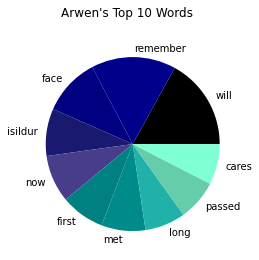

In [5]:
colors = ["black", "darkblue", "navy", "midnightblue", "darkslateblue", 
          "teal", "darkcyan", "lightseagreen", "mediumaquamarine", "aquamarine"]
plt.pie(df_arwtop["count"], labels = df_arwtop["word"], colors = colors)
plt.suptitle("Arwen's Top 10 Words")
plt.show()

## Bottom 10 Bar Graph

Next, analyze the bottom 10 words spoken by Arwen using a bar graph.  We can see that the distribution of the bottom 10 words are more similar than the distribution of the top 10 words used; i.e. the words that are not stopwords that are used the least frequently are used about the same # of times.

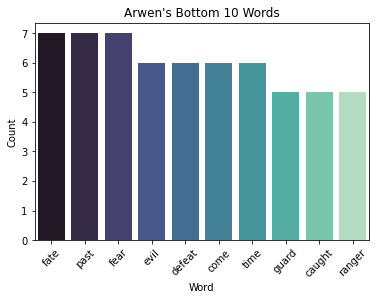

In [35]:
df_arwbot = df_arw.sort_values("count", ascending = False).tail(10)

sns.barplot(x = df_arwbot["word"], y = df_arwbot["count"], palette = "mako")
plt.title("Arwen's Bottom 10 Words")
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Galadriel

## Webscraping

In [7]:
page = requests.get('https://www.imdb.com/title/tt0120737/quotes/?tab=qt&ref_=tt_trv_qu')
soup = BeautifulSoup(page.content, 'html.parser')

quote_soup = soup.select('div.sodatext p a')

corpus = {}
word_list = []
character_word_list = []

character_list = ['Galadriel']

for quote in quote_soup:
    for character in character_list:
        if quote.text.lower() == character.lower():
            character_quote = quote.next_sibling
            gram_to_remove = [':', '[', '\n', ',', '?', '.', '!', '\'s']
            for gram in gram_to_remove:
                character_quote = character_quote.replace(gram, '')
            if character_quote:
                words = []
                for word in character_quote.split():
                    words.append(word.lower())
                word_list.extend(words)
            character_word_list.extend(word_list)
            corpus[character] = [word for word in character_word_list if word not in STOPWORDS]
        

character_word_freq = {}
for character in corpus:
    word_count_list = []
    unique_word_list = set(corpus[character])
    for word in unique_word_list:
        word_count = (word, corpus[character].count(word))
        word_count_list.append(word_count)
    character_word_freq[character] = word_count_list

df_galadriel = pd.DataFrame(character_word_freq[character])
df_galadriel.columns = ['word', 'count']
df_gal = df_galadriel.assign(character = 'Galadriel')[['character'] + df_galadriel.columns.tolist()]

## Dataframe with Galadriel's Words

We see below that Galadriel has more unique words that are not stopwords than Arwen.

In [8]:
df_gal = df_galadriel.assign(character = 'Galadriel')[['character'] + df_galadriel.columns.tolist()]
df_gal

,character,word,count
0,Galadriel,immortal,8
1,Galadriel,feel,16
2,Galadriel,fail,15
3,Galadriel,great,16
4,Galadriel,forged,8
...,...,...,...
117,Galadriel,heart,14
118,Galadriel,love,13
119,Galadriel,seas,13
120,Galadriel,smallest,9


## Galadriel's Top Words Analysis

We will inspect Galadriel's top words via pie graph.  We see that her most frequently used words include "will" and "ring" followed by "one" (which makes sense, as everyone says the one ring quite often).

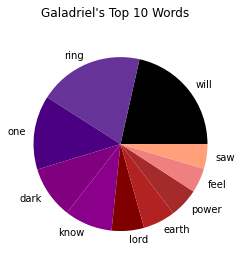

In [9]:
df_galtop = df_gal.sort_values("count", ascending = False).head(10)
colors = ["black", "rebeccapurple", "indigo", "purple", "darkmagenta", 
          "maroon", "firebrick", "brown", "lightcoral", "lightsalmon"]
plt.pie(df_galtop["count"], labels = df_galtop["word"], colors = colors)
plt.suptitle("Galadriel's Top 10 Words")
plt.show()

## Galadriel's Bottom Words Analysis

Now we will analyze the bottom 10 words via bar graph.

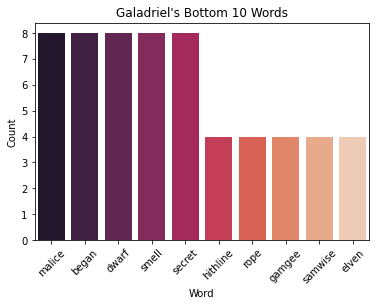

In [34]:
df_galbot = df_gal.sort_values("count", ascending = False).tail(10)

sns.barplot(x = df_galbot["word"], y = df_galbot["count"], palette = "rocket")
plt.title("Galadriel's Bottom 10 Words")
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Analysis Comparing Arwen's and Galadriel's Words and Word Frequencies

First analyze visually using word clouds to see the different types of words used:

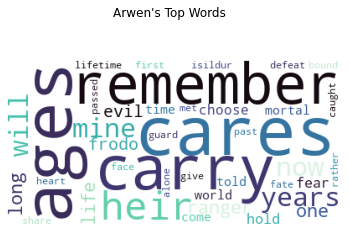

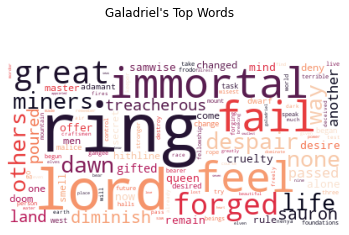

In [26]:
## create strings
arwen_words = df_arw["word"].to_string()
galadriel_words = df_gal["word"].to_string()

## create word clouds
wordcloud = WordCloud(max_font_size = 80, background_color = "white", 
                      collocations = True, colormap = "mako").generate(arwen_words)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.suptitle("Arwen's Top Words")
plt.show()

wordcloud = WordCloud(max_font_size = 80, background_color = "white", 
                      collocations = True, colormap = "rocket").generate(galadriel_words)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.suptitle("Galadriel's Top Words")
plt.show()


From the above, one can see that the actual unique words differ between Arwen and Galadriel.  It seems Galadriel has more words that correspond to the plot of the film, such as "ring" and "lord" and "forged" whereas Arwen has words that relate to Aragorn such as  "heir" and "life" and "choose."  It also seems as though Arwen has fewer unique words in general than Galadriel, evidenced by less words visible in her word cloud.

## Is there evidence the the average frequency of unique words Arwen and Galadriel uses differs?

Now that we've seen that the words themselves are different, we will see if the frequency at which the words are used differs.  We start with a side-by-side plot analysis for visualizing the average difference.

First, we combine Galadriel and Arwen Word Dataframes

In [12]:
df_fem = df_arw.append(df_gal, ignore_index = True)
df_fem

,character,word,count
0,Arwen,cares,12
1,Arwen,ages,11
2,Arwen,carry,12
3,Arwen,remember,25
4,Arwen,heir,7
...,...,...,...
157,Galadriel,heart,14
158,Galadriel,love,13
159,Galadriel,seas,13
160,Galadriel,smallest,9


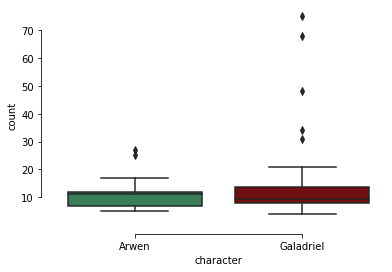

In [33]:
sns.boxplot(x = "character", y = "count", palette = ["seagreen", "maroon"], data = df_fem)
sns.despine(offset = 10, trim = True)

From the above analysis it does not appear that the boxplots themselves differ much but Galadriel has more outliers of words used more frequently than others.  Do the outliers cause Galadriel's mean to be larger than the average use of words for Arwen?

## t-Test to Analyze if average frequency of words Arwen uses is smaller than that of Galadriel's

Assign Arwen to population 1 and Galadriel to population 2.

(i) &nbsp;  H<sub>o</sub>: $\mu$<sub>1</sub> = $\mu$<sub>2</sub> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    H<sub>a</sub>: $\mu$<sub>1</sub> < $\mu$<sub>2</sub>

(ii) Find the test statistic:

t<sub>obs</sub> = $\frac{(\bar{x}_1 - \bar{x}_2)} {√( \frac{s1^2}{n_1} + \frac{s2^2}{n_2} )}$

In [14]:
xbar_arw = df_fem.groupby("character")["count"].mean()[0]
xbar_gal = df_fem.groupby("character")["count"].mean()[1]
s_arw = df_fem.groupby("character")["count"].std()[0]
s_gal = df_fem.groupby("character")["count"].std()[1]
n_arw = df_fem.groupby("character")["count"].count()[0]
n_gal = df_fem.groupby("character")["count"].count()[1]
dic = {"Arwen": [xbar_arw, s_arw, n_arw], "Galadriel": [xbar_gal, s_gal, n_gal]}
dic

{'Arwen': [10.6, 4.589843860815602, 40],
 'Galadriel': [12.204918032786885, 9.485908230206718, 122]}

In [15]:
tobs = (xbar_arw - xbar_gal) / (s_arw**2/n_arw + s_gal**2/n_gal)**(1/2)
tobs

-1.4273819264487573

(iii) Find degrees of freedom (df) and p-value P(t < t <sub>obs</sub>)

In [16]:
df = (s_arw**2/n_arw + s_gal**2/n_gal )**2 / ( (s_arw**2/(n_arw))**2/(n_arw-1) + (s_gal**2/(n_gal))**2/(n_gal-1))
df

137.6860494123226

In [17]:
t_dist = scipy.stats.t(df)
pval = t_dist.cdf(tobs)
pval

0.07786693310449783

This p-value suggests that at certain levels of significance we would not expect the average frequency that Arwen's words have is smaller than that of Galadriel's, such as alpha = 1% or 5%.  At 10% level of significance it does seem that Galadriel's words on average occur more frequently.

## Follow Up

Ideas for follow up analysis:

- Analyze all words from all movies and compare average frequencies for characters between movies.
- Include movies 2 and 3 and compare the character's words in each movie.
- Analyze via groups of characters (i.e. elves vs. dwarves, hobbits vs. men)